In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


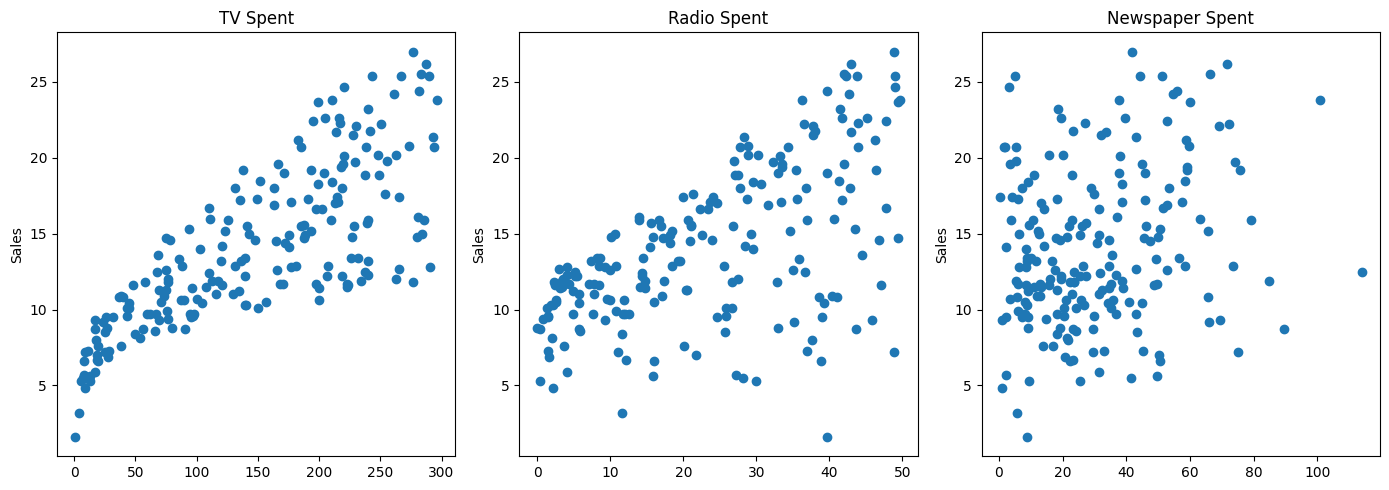

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spent")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spent")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spent")

plt.tight_layout()

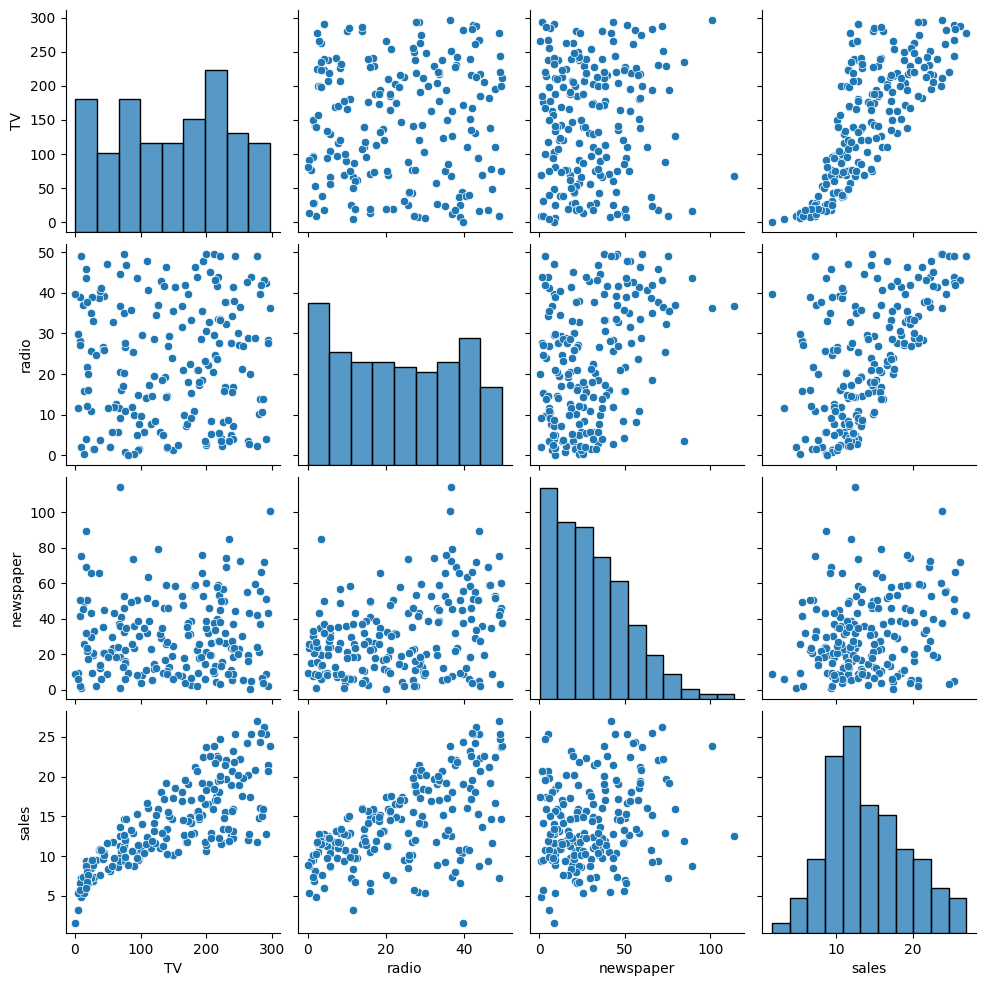

In [17]:
sns.pairplot(df)

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
X = df.drop('sales', axis=1)
y = df['sales']
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [42]:
print(len(df))
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
X_train.head()

200
134 66
134 66


,TV,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6


In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y.mean() # df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

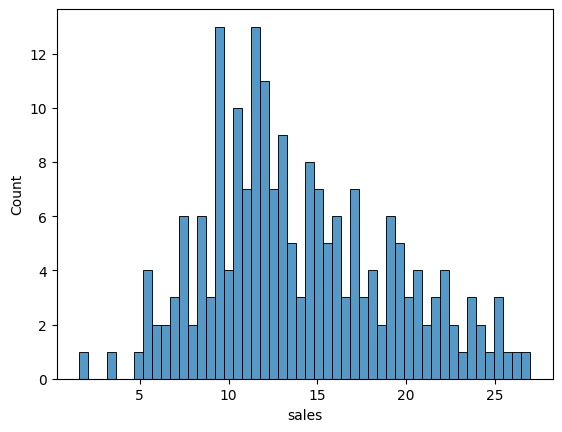

In [48]:
# we can also see here than mean in 14
sns.histplot(data=df, x='sales', bins=50)

In [52]:
y_pred = model.predict(X_test)

from sklearn .metrics import mean_absolute_error, mean_squared_error
 
print(mean_absolute_error(y_test, y_pred)) # MAE # we have 10% error (mean is 14) 
print(mean_squared_error(y_test, y_pred))  # MSE we have 26% error (mean is 14) it's worse
# since we have a large gap between MAE and MSE it means data's has a lot of gap between themselves(ie seri data khoob tashkhis dade nashode ba in algorithm)
print(np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE

1.4937750024728969
3.7279283306815105
1.9307843822347204


In [54]:
# Residual Plots
# instead of doing math let's plot them
residual = y_test - y_pred

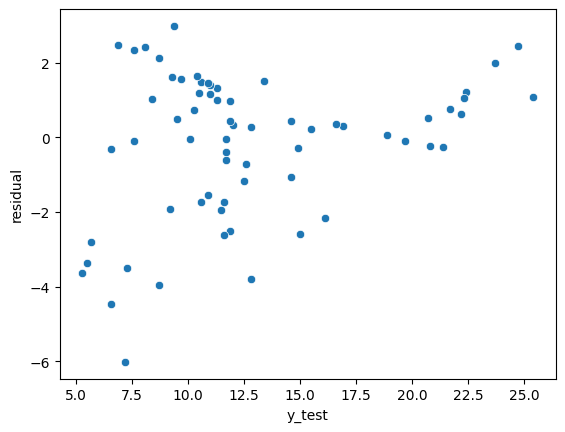

In [ ]:
sns.scatterplot(x= y_test, y=residual)
plt.xlabel("y_test")
plt.ylabel("residual")

plt.show()
# we see no pattern so it's good for regression algorithm 

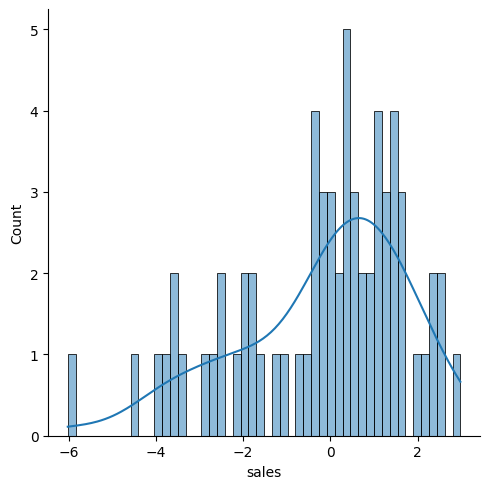

In [64]:
sns.displot(residual, bins=50, kde=True)
# it's almost normal distributuin so it's good for regression(look around 0 in x axis)
# we must check both graphs(first one is more important)

In [65]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [ ]:
final_model.coef_
# zarib x ha(first tv, second radio, third newspaper )
# since newspaper coef is near 0 it means don't spend time on newpapers sale cause it doesn't have much impact(negative impact :) it means we will lose money) we saw it on its scatter plot too
# radio advertisment has the most impact(4 times more)
# negative coef means we will lose money if we increase the tv advertisment
# q coef means if we spend 1$ we will gain 1$

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# saving models into files
from joblib import dump
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [70]:
# loading models
from joblib import load
loaded_model = load('final_sales_model.joblib')

In [71]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
camp = [[149, 22, 12]] # enghad vase tv, radio, newspaper hazine kardim
# age enghad hazine konim 14$ dar miarim
loaded_model.predict(camp)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])